In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split



In [6]:
df = pd.read_csv("stud.csv")

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Preparing X and Y Label

In [9]:
X = df.drop(columns = ["math_score"], axis = 1)

In [10]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [11]:
print("Categorical in 'gender' variable: ", end = " ")
print(df["gender"].unique())
print("\n")

print("Categorical in 'race_ethnicity' variable: ", end = " ")
print(df["race_ethnicity"].unique())
print("\n")

print("Categorical in 'parental_level_of_education' variable: ", end = " ")
print(df["parental_level_of_education"].unique())
print("\n")

print("Categorical in 'lunch' variable: ", end = " ")
print(df["lunch"].unique())
print("\n")

print("Categorical in 'test_preparation_course' variable: ", end = " ")
print(df["test_preparation_course"].unique())
print("\n")


Categorical in 'gender' variable:  ['female' 'male']


Categorical in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']


Categorical in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


Categorical in 'lunch' variable:  ['standard' 'free/reduced']


Categorical in 'test_preparation_course' variable:  ['none' 'completed']




In [12]:
y = df["math_score"]



In [13]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [16]:
# Create columns Transform with 3 type of transformers

num_feature = X.select_dtypes(exclude = "object").columns
cat_feature = X.select_dtypes(exclude = "object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessing = ColumnTransformer(
   [ 
    ("OneHotEncoder", oh_transformer, cat_feature),
    ("StandardScaler", numeric_transformer, num_feature),
   ]   
)

In [17]:
X = preprocessing.fit_transform(X)

In [21]:
X.shape

(1000, 151)

 # Applying Train Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 44)

print(X_train.shape)
print(X_test.shape)

(800, 151)
(200, 151)


In [23]:
# Creating an evalution function to give all metrics after model training

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)

    return mae, rmse, r2_square

In [24]:
# Dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K - Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

# Assuming you have a function evaluate_model(y_true, y_pred) returning: MAE, RMSE, R2
for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(name)
    model_list.append(name)

    print("Model performance for Training set")
    print(" - Root Mean Square Error: {:.4f}".format(model_train_rmse))
    print(" - Mean Absolute Error: {:.4f}".format(model_train_mae))       
    print(" - R2 Score: {:.4f}".format(model_train_r2))          

    print("-" * 40)

    print("Model performance for Test set")
    print(" - Root Mean Square Error: {:.4f}".format(model_test_rmse))
    print(" - Mean Absolute Error: {:.4f}".format(model_test_mae))
    print(" - R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("=" * 40)
    print("\n")

Linear Regression
Model performance for Training set
 - Root Mean Square Error: 7.8295
 - Mean Absolute Error: 6.2763
 - R2 Score: 0.7315
----------------------------------------
Model performance for Test set
 - Root Mean Square Error: 9.5987
 - Mean Absolute Error: 7.6694
 - R2 Score: 0.6081


Lasso
Model performance for Training set
 - Root Mean Square Error: 8.7761
 - Mean Absolute Error: 7.1212
 - R2 Score: 0.6626
----------------------------------------
Model performance for Test set
 - Root Mean Square Error: 8.4732
 - Mean Absolute Error: 6.7828
 - R2 Score: 0.6946


Ridge
Model performance for Training set
 - Root Mean Square Error: 7.8782
 - Mean Absolute Error: 6.3971
 - R2 Score: 0.7281
----------------------------------------
Model performance for Test set
 - Root Mean Square Error: 9.1708
 - Mean Absolute Error: 7.3985
 - R2 Score: 0.6422


K - Neighbors Regressor
Model performance for Training set
 - Root Mean Square Error: 7.7291
 - Mean Absolute Error: 6.2055
 - R2 Sco

# Result

In [25]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model Name", "R2_Score"]).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score
1,Lasso,0.694582
6,AdaBoost Regressor,0.677601
3,K - Neighbors Regressor,0.663242
2,Ridge,0.642224
5,Random Forest Regressor,0.627718
0,Linear Regression,0.608057
4,Decision Tree,0.479493


# Linear Regression

In [26]:
lr_model = LinearRegression(fit_intercept = True)
lr_model = lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print("Accuracy of these model is %.2f" %score)


Accuracy of these model is 60.81


# Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

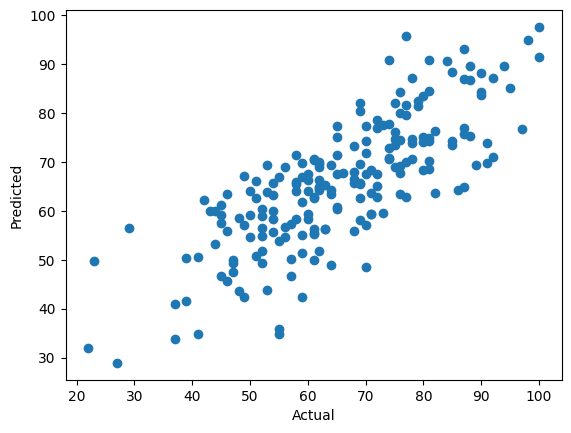

In [27]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")


<Axes: xlabel='math_score'>

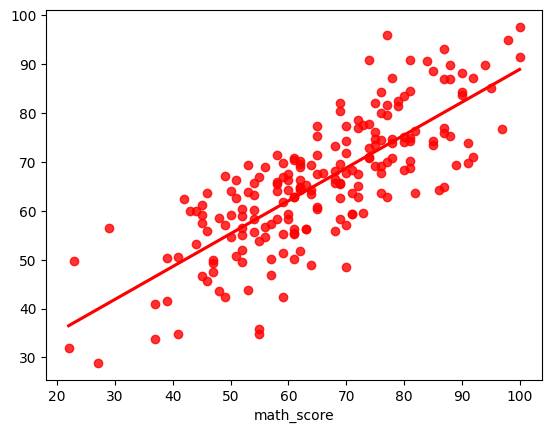

In [28]:
sns.regplot(x=y_test, y=y_pred, ci = None, color = "red")

# Difference between Actual and predicted value

In [29]:
pred_df=pd.DataFrame({"Actual Value": y_test,"Predicted Value": y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
118,51,62.689205,-11.689205
19,54,55.711826,-1.711826
41,58,71.343133,-13.343133
425,62,64.695147,-2.695147
221,87,75.806572,11.193428
...,...,...,...
714,60,64.148738,-4.148738
744,55,53.843504,1.156496
671,52,54.939148,-2.939148
286,97,76.748621,20.251379
